#### 2.4.2 Predicting Probabilities
- predict_proba
  - 각 분류 클래스에 대한 확률값 반환
  - 반환값의 shape는 항상 (n_samples, 2)
    - 각 샘플당 첫번째 원소는 첫번째 클래스의 예측 확률, 두번째 원소는 두번째 클래스의 예측 확률
    - 두 원소 값의 합은 항상 1.0
  - overfitting 된 모델에서는 각 클래스에 대한 예측 확률이 높은 편 --> 즉, 예측 확신이 강함
  - 일반적으로 복잡도가 낮은 모델은 예측에 대해 불확실성이 높고 예측 확률이 낮은 편
- 불확실의 정도와 모델의 정확도가 동일 --> 보정(Calibration)이 잘 되었다고 판단
  - 보정이 잘 된 모델에서는 70% 확신을 지닌 예측은 70%의 정확도를 냄

In [10]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
import numpy as np

gbrt = GradientBoostingClassifier(random_state=0)
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)


In [12]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [16]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))
print("Predictions:\n{}".format(gbrt.predict(X_test[:6])))

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red']


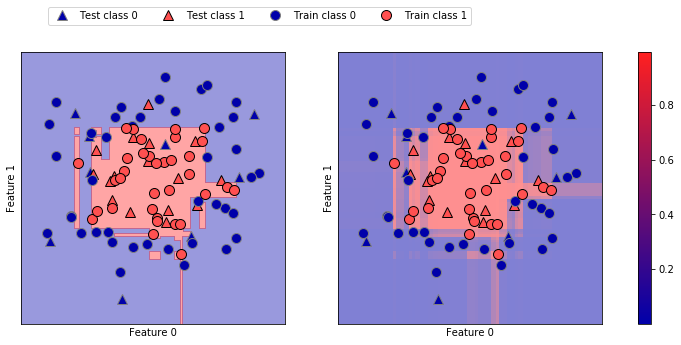

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

- 많은 모델에 대한 불확실성 추정 도표
  - http://bit.ly/2cqCYx6